In [1]:
import tensorflow as tf

In [4]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
from tensorflow.examples.tutorials.mnist import input_data

In [6]:
mnist = input_data.read_data_sets("dataset/", one_hot=True)

Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Extracting dataset/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Extracting dataset/train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting dataset/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting dataset/t10k-labels-idx1-ubyte.gz


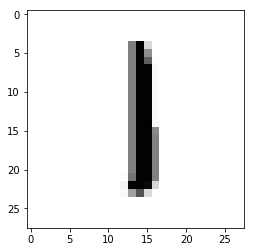

In [11]:
plt.imshow(mnist.train.images[12].reshape(28,28), cmap='Greys')

In [13]:
def generator(z, reuse=None):
    with tf.variable_scope('gen', reuse=reuse):
        hidden1 = tf.layers.dense(inputs=z, units=128)
        
    alpha = 0.1
    hidden1 = tf.maximum(hidden1, alpha * hidden1)
    hidden2 = tf.layers.dense(inputs=hidden1, units=128)
    hidden2 = tf.maximum(hidden2, alpha * hidden2)
    output = tf.layers.dense(inputs=hidden2, units=784, activation=tf.nn.tanh)
    
    return output

In [ ]:
def discriminator(X, reuse=None):
    with tf.variable_scope('dis', reuse=reuse):
        hidden1 = tf.layers.dense(inputs=X, units=128)
        
    alpha = 0.1
    hidden1 = tf.maximum(hidden1, alpha * hidden1)
    hidden2 = tf.layers.dense(inputs=hidden1, units=128)
    hidden2 = tf.maximum(hidden2, alpha * hidden2)
    
    logits = tf.layers.dense(inputs=hidden2, units=1)
    output = tf.sigmoid(logits)
    
    return output